In [1]:
!pip install pydub
!pip install pickle5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255316 sha256=3938e839566ae80c8b48fe1748c5e3355a2e46f9b895d9d671609db8f7ffafcc
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
import librosa.display
import json
from tqdm import tqdm
import os
import tensorflow as tf


import IPython.display
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import  f1_score
from tensorflow.keras.callbacks import Callback
import tensorflow.keras.backend as K
import librosa
from tensorflow import keras
from keras.callbacks import Callback
from keras.callbacks import TensorBoard
import pydub
import pickle5 as pickle
import librosa.display
import os

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except Exception as e:
    print(f"Error mounting Google Drive: {e}")


Mounted at /content/drive


In [4]:
# Path to the directory containing MP3 recordings
mp3_path = '/content/drive/MyDrive/DataAML/recordings/recordings/'

In [5]:
import os

if os.path.exists(mp3_path):
    files = os.listdir(mp3_path)
    print(files)
else:
    print(f"Path not found: {mp3_path}")

['hebrew7.mp3', 'hebrew4.mp3', 'hindi12.mp3', 'hungarian1.mp3', 'hmong1.mp3', 'hmong2.mp3', 'hebrew3.mp3', 'hindi9.mp3', 'hausa8.mp3', 'hungarian9.mp3', 'hausa5.mp3', 'hausa3.mp3', 'hindi11.mp3', 'hungarian3.mp3', 'hausa7.mp3', 'indonesian6.mp3', 'italian1.mp3', 'italian12.mp3', 'ilonggo1.mp3', 'icelandic3.mp3', 'italian17.mp3', 'italian18.mp3', 'indonesian4.mp3', 'italian32.mp3', 'igbo2.mp3', 'italian19.mp3', 'italian10.mp3', 'italian23.mp3', 'ife1.mp3', 'indonesian5.mp3', 'italian3.mp3', 'indonesian2.mp3', 'italian25.mp3', 'italian2.mp3', 'italian26.mp3', 'icelandic2.mp3', 'italian22.mp3', 'indonesian3.mp3', 'igbo3.mp3', 'italian27.mp3', 'italian6.mp3', 'italian5.mp3', 'italian13.mp3', 'italian16.mp3', 'italian14.mp3', 'italian24.mp3', 'italian15.mp3', 'ibibio2.mp3', 'ibibio1.mp3', 'indonesian1.mp3', 'italian28.mp3', 'italian11.mp3', 'italian21.mp3', 'indonesian8.mp3', 'italian30.mp3', 'indonesian7.mp3', 'italian4.mp3', 'italian20.mp3', 'icelandic1.mp3', 'italian31.mp3', 'igbo1.mp3',

In [6]:
try:
    mp3_filenames = os.listdir(mp3_path)
    print(f"Number of files found: {len(mp3_filenames)}")
except FileNotFoundError:
    print(f"Directory not found: {mp3_path}")

Number of files found: 2138


In [7]:
from pydub import AudioSegment

if mp3_filenames:
    example_file = mp3_filenames[0]
    audio = AudioSegment.from_mp3(mp3_path + example_file)
    print(f"Loaded file: {example_file}")
else:
    print("No MP3 files found in the directory.")


Loaded file: hebrew7.mp3


In [8]:
wav_path = '/content/drive/MyDrive/DataAML/recordings/wav/'

try:
    wav_filenames = os.listdir(wav_path)
    if wav_filenames:
        example_wave_filename = wav_filenames[0]
        example_wave, example_sr = librosa.load(wav_path + example_wave_filename, mono=True)
        print(f"Loaded WAV file: {example_wave_filename}")
    else:
        print("No WAV files found in the directory.")
except FileNotFoundError:
    print(f"Directory not found: {wav_path}")


Loaded WAV file: dutch3.wav


In [9]:
from tqdm.auto import tqdm

file_name_mfcc = []
for filename in tqdm(wav_filenames, desc="Extracting MFCC"):
    try:
        wave, sr = librosa.load(wav_path + filename, mono=True)
        mfcc = librosa.feature.mfcc(y=wave, sr=sr)
        file_name_mfcc.append([filename, wave, mfcc, sr])
    except Exception as e:
        print(f"Error processing {filename}: {e}")


Extracting MFCC:   0%|          | 0/2138 [00:00<?, ?it/s]

In [10]:
file_name_mfcc_df = pd.DataFrame(file_name_mfcc, columns=['Filename', 'Wave', 'MFCC', 'SampleRate'])
print(file_name_mfcc_df.head())


      Filename                                               Wave  \
0   dutch3.wav  [-1.2286007e-05, -8.648785e-06, -1.2129894e-06...   
1  dutch47.wav  [0.00027062165, 0.0004607554, 0.00074456714, 0...   
2  dutch23.wav  [0.002694809, 0.00406893, 0.003953251, 0.00417...   
3  dutch15.wav  [2.0103284e-05, -8.6206273e-07, 7.642557e-06, ...   
4  dutch13.wav  [0.0021557808, 0.0035218182, 0.0029537925, 0.0...   

                                                MFCC  SampleRate  
0  [[-486.25443, -374.78333, -348.9275, -346.9744...       22050  
1  [[-516.39923, -508.06088, -511.3895, -514.771,...       22050  
2  [[-548.496, -574.7447, -596.69055, -596.6928, ...       22050  
3  [[-611.2188, -611.2188, -611.2188, -611.2188, ...       22050  
4  [[-473.73676, -461.5163, -469.26108, -465.6553...       22050  


In [17]:
# Creating a smaller DataFrame with specific columns
if 'Filename' in file_name_mfcc_df.columns and 'MFCC' in file_name_mfcc_df.columns:
    small_df = file_name_mfcc_df[['Filename', 'MFCC', 'SampleRate']]
else:
    print("Required columns not found in the DataFrame.")


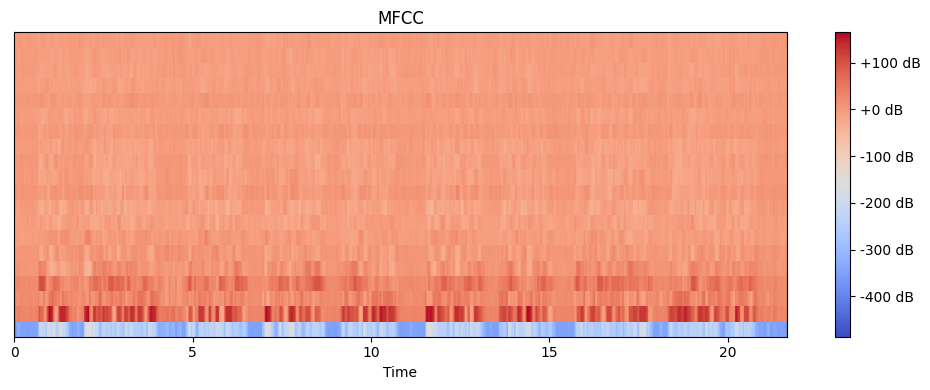

In [19]:
if not small_df.empty and 'MFCC' in small_df.columns:
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(small_df['MFCC'][0], x_axis='time', sr=small_df['SampleRate'][0])
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()
else:
    print("MFCC data not available for visualization.")

In [20]:
if 'Filename' in small_df.columns:
    small_df['native_language'] = small_df['Filename'].str.extract(r'([^\d]+)', expand=False)
else:
    print("File names not available for label extraction.")


In [21]:
small_df['native_language'] = small_df.apply(lambda x: ''.join([i for i in x['native_language'] if not i.isdigit()]), axis=1)


In [22]:
small_df['flag']=np.where(small_df['native_language']=='english',1,0)
small_df[small_df['native_language']=='english'].iloc[:30]

,Filename,MFCC,SampleRate,native_language,flag
50,english133.wav,"[[-438.1929, -420.52206, -421.09845, -423.3392...",22050,english,1
51,english122.wav,"[[-579.7075, -575.2393, -575.9098, -576.16833,...",22050,english,1
52,english134.wav,"[[-428.71567, -425.77945, -446.1692, -445.9987...",22050,english,1
53,english103.wav,"[[-461.3125, -467.71704, -474.062, -475.93628,...",22050,english,1
54,english127.wav,"[[-553.33575, -540.83264, -544.7995, -544.0653...",22050,english,1
55,english111.wav,"[[-529.31384, -529.31384, -529.31384, -529.313...",22050,english,1
56,english120.wav,"[[-514.93256, -502.24823, -504.01514, -507.324...",22050,english,1
57,english106.wav,"[[-562.2517, -562.2517, -562.2517, -562.2517, ...",22050,english,1
58,english112.wav,"[[-523.782, -521.95715, -520.9799, -521.9167, ...",22050,english,1
59,english146.wav,"[[-500.4557, -508.70013, -535.2393, -539.4193,...",22050,english,1


In [23]:
if 'MFCC' in small_df.columns and not small_df['MFCC'].empty:
    MFCC_MAX_LEN = max(arr.shape[1] for arr in small_df['MFCC'])
    print(f"Maximum MFCC Length: {MFCC_MAX_LEN}")
else:
    print("MFCC column not found or empty.")


Maximum MFCC Length: 4589


In [24]:
if 'MFCC' in small_df.columns and not small_df['MFCC'].empty:
    MFCC_NUM = max(arr.shape[0] for arr in small_df['MFCC'])
    print(f"Number of MFCC Coefficients: {MFCC_NUM}")
else:
    print("MFCC column not found or empty.")


Number of MFCC Coefficients: 20


In [25]:
def resize_mfcc(df, max_len):
    if 'MFCC' in df.columns:
        df['padded_mfcc'] = df['MFCC'].apply(lambda x: librosa.util.fix_length(data=x, size=max_len, axis=1))
        return df
    else:
        print("MFCC column not found in the DataFrame.")
        return df

if 'MFCC_MAX_LEN' in locals():
    df = resize_mfcc(small_df, MFCC_MAX_LEN)
else:
    print("MFCC_MAX_LEN not defined.")


In [26]:
from sklearn.model_selection import train_test_split

if not df.empty:
    train_df, rest_df = train_test_split(df, test_size=0.6, random_state=123)
    val_df, test_df = train_test_split(rest_df, test_size=0.5, random_state=123)
else:
    print("DataFrame is empty. Cannot split data.")


In [27]:
if not train_df.empty and 'padded_mfcc' in train_df.columns:
    x_train = np.array(list(train_df['padded_mfcc']))
else:
    print("Training data is not available or incomplete.")

if not val_df.empty and 'padded_mfcc' in val_df.columns:
    x_val = np.array(list(val_df['padded_mfcc']))
else:
    print("Validation data is not available or incomplete.")

if not test_df.empty and 'padded_mfcc' in test_df.columns:
    x_test = np.array(list(test_df['padded_mfcc']))
else:
    print("Test data is not available or incomplete.")


In [28]:
label_column = 'flag'  # Replace with the actual label column name if different

if label_column in train_df.columns:
    y_train = train_df[label_column].values
else:
    print("Label column not found in training data.")

if label_column in val_df.columns:
    y_val = val_df[label_column].values
else:
    print("Label column not found in validation data.")

if label_column in test_df.columns:
    y_test = test_df[label_column].values
else:
    print("Label column not found in test data.")


In [29]:
feature_dim_1 = MFCC_NUM
feature_dim_2 = MFCC_MAX_LEN
channel = 1

In [30]:
x_train_reshaped = x_train.reshape(x_train.shape[0], feature_dim_1, feature_dim_2, channel)
x_val_reshaped = x_val.reshape(x_val.shape[0], feature_dim_1, feature_dim_2, channel)
x_test_reshaped =  x_test.reshape(x_test.shape[0], feature_dim_1, feature_dim_2, channel)

In [51]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train is a 1D array of integer labels
y_train_encoded = to_categorical(y_train)
num_classes = y_train_encoded.shape[1]

y_val_encoded = to_categorical(y_val)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization


model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(64)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

from tensorflow.keras.utils import to_categorical

# Assuming y_train is a 1D array of integer labels
y_train_encoded = to_categorical(y_train)
num_classes = y_train_encoded.shape[1]

model.add(Dense(1, activation='sigmoid'))

In [56]:
callbacks = [TensorBoard(log_dir='./logs')]

In [57]:
# Assuming x_train_reshaped is your input with shape (None, 20, 4589, 1)
# And you want to remove the last dimension because it's unnecessary
x_train_reshaped = x_train_reshaped.reshape(x_train_reshaped.shape[0], x_train_reshaped.shape[1], x_train_reshaped.shape[2])


In [59]:
import tensorflow as tf
from tensorflow import keras

# Assuming model is already defined and x_train_reshaped, y_train, x_val_reshaped, y_val, and callbacks are defined

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(x_train_reshaped, y_train,
                    batch_size=64,
                    epochs=200,
                    verbose=1,
                    validation_data=(x_val_reshaped, y_val),
                    callbacks=callbacks,
                    class_weight={0: 1, 1: int(len(y_train)/y_train.sum())})


Epoch 1/200
14/14 [==============================] - 13s 222ms/step - loss: 0.0000e+00 - accuracy: 0.5170 - val_loss: 0.0000e+00 - val_accuracy: 0.7254
Epoch 2/200
14/14 [==============================] - 1s 39ms/step - loss: 0.0000e+00 - accuracy: 0.5766 - val_loss: 0.0000e+00 - val_accuracy: 0.7348
Epoch 3/200
14/14 [==============================] - 1s 38ms/step - loss: 0.0000e+00 - accuracy: 0.6398 - val_loss: 0.0000e+00 - val_accuracy: 0.7317
Epoch 4/200
14/14 [==============================] - 1s 38ms/step - loss: 0.0000e+00 - accuracy: 0.6269 - val_loss: 0.0000e+00 - val_accuracy: 0.7176
Epoch 5/200
14/14 [==============================] - 1s 38ms/step - loss: 0.0000e+00 - accuracy: 0.6456 - val_loss: 0.0000e+00 - val_accuracy: 0.6615
Epoch 6/200
14/14 [==============================] - 1s 39ms/step - loss: 0.0000e+00 - accuracy: 0.6842 - val_loss: 0.0000e+00 - val_accuracy: 0.6895
Epoch 7/200
14/14 [==============================] - 1s 37ms/step - loss: 0.0000e+00 - accuracy: 0

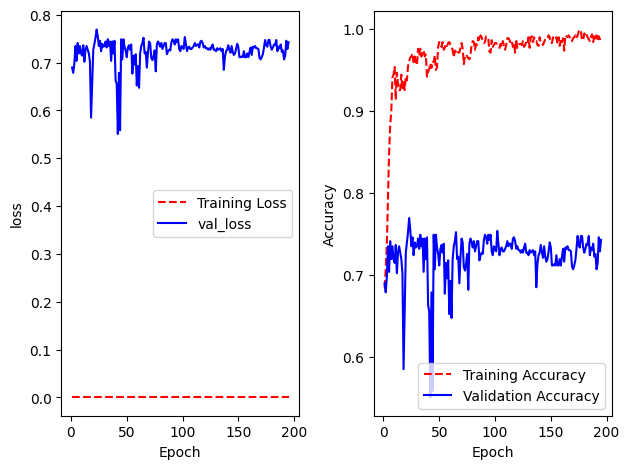

In [60]:
train_loss = history.history['loss'][5:]
val_loss = history.history['val_loss'][5:]
train_acc = history.history['accuracy'][5:]
val_acc = history.history['val_accuracy'][5:]

epoch_count = range(1,len(train_acc)+1)

plt.subplots(1,2)
plt.subplot(1,2,1)
plt.plot(epoch_count, train_loss, 'r--')
plt.plot(epoch_count, val_acc,'b-')
plt.legend(['Training Loss','val_loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(epoch_count, train_acc,'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [61]:
print("Evaluate on test data")
results = model.evaluate(x_test_reshaped, y_test, batch_size = 128)
print("test loss, test acc:", results)
predictions = model.predict(x_test_reshaped)
print('predoctions shape: ', predictions.shape)


Evaluate on test data
6/6 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - accuracy: 0.7181
test loss, test acc: [0.0, 0.718068540096283]
21/21 [==============================] - 3s 9ms/step
predoctions shape:  (642, 1)


In [62]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)

In [63]:
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)

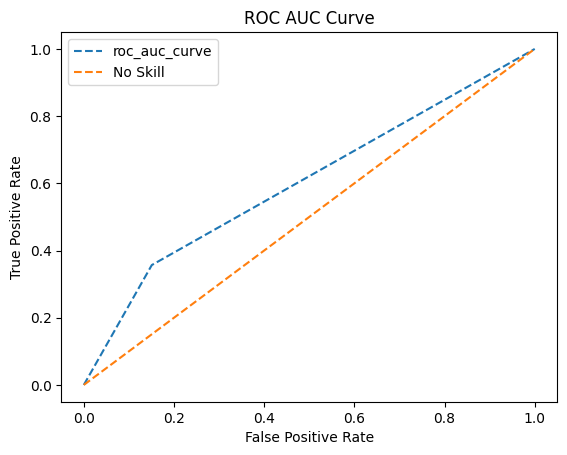

In [64]:
plt.plot(fpr, tpr, linestyle = '--', label = 'roc_auc_curve')
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.title('ROC AUC Curve')
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions.round())
print(confusion_matrix(y_test, predictions.round()))

[[400  71]
 [110  61]]


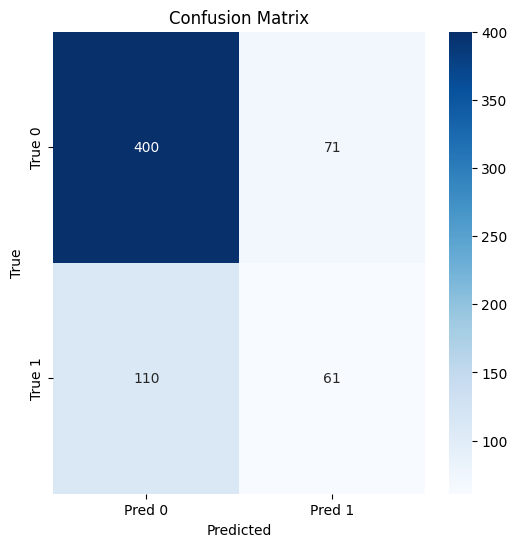

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

if 'y_test' in locals() and 'predictions' in locals():
    cm = confusion_matrix(y_test, predictions.round())
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Test labels or predictions not available.")


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions.round()))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       471
           1       0.46      0.36      0.40       171

    accuracy                           0.72       642
   macro avg       0.62      0.60      0.61       642
weighted avg       0.70      0.72      0.71       642



In [69]:
model.save('200RNNl.h5')
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirect  (None, 20, 256)           4831232   
 ional)                                                          
                                                                 
 batch_normalization_16 (Ba  (None, 20, 256)           1024      
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 20, 256)           0         
                                                                 
 bidirectional_13 (Bidirect  (None, 20, 256)           394240    
 ional)                                                          
                                                                 
 batch_normalization_17 (Ba  (None, 20, 256)           1024      
 tchNormalization)                                    

In [70]:
model.save_weights('200RNNmodel_weights.h5')